In [320]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [321]:
N_likelihoods = 1000
data_dimension = 5

In [322]:
#define weights w
w = np.random.random(N_likelihoods)
w = w/np.sum(w)

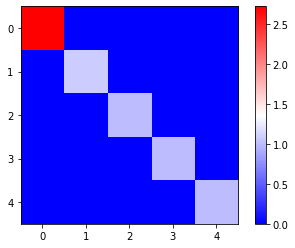

In [323]:
#define unitary covariance matrices
x = np.linspace(0, 1, data_dimension)
cov = np.eye(len(x))
C0 = 1
for i in range(data_dimension):
    for j in range(data_dimension):
        #cov[i,j] = C0*np.exp(-(x[i]-x[j])**2/.01)
        cov[i,i] = C0*np.exp(np.exp(-(x[i])/.10))
plt.imshow(cov, cmap = 'bwr', )
plt.colorbar()

In [324]:
#define model
x = np.linspace(0, 1, data_dimension)
def model(p):
    a, b, c =p
    return c * np.exp(-(a * x ** 2 + b * x))

In [325]:
atrue= 1
btrue = 1
ctrue = 20
true_value = [atrue, btrue, ctrue]
data0 = model([atrue, btrue, ctrue]) 

<ErrorbarContainer object of 3 artists>

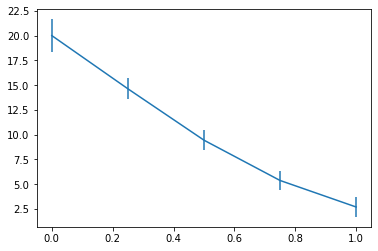

In [326]:
plt.errorbar(x, data0, cov.diagonal()**.5)

In [327]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import forecast

In [328]:
d_model=forecast.first_derivative(true_value, model, model(true_value).shape, delta = 1e-3)

In [329]:
d_model.shape

(3, 5)

In [330]:
randoms=np.random.randn(N_likelihoods)

In [331]:
sigma_coeff_var = np.linspace(.0, .99, 20)
res_cov_ind = [] 
cov_param = []
for i in range(len(sigma_coeff_var)):
    sv = sigma_coeff_var[i]
    coeffs_var = np.linspace(1 - sv, 1 + sv, N_likelihoods)
    covs = np.copy(cov)
    cov_list = []
    inv_cov_list = []
    cov_param_ind = []
    for k in range(N_likelihoods):
        for i in range(data_dimension):
            for j in range(data_dimension):
                covs[i,j] = cov[i,j]
                if i==j: covs[i,i] = coeffs_var[k]*cov[i,i]
        cov_list.append(covs)
        inv_covs = np.linalg.inv(covs)
        inv_cov_list.append(inv_covs)
        F_ind=F.Fisher_Matrix_Gaussian_XX(inv_covs, d_model, 3)
        cp = np.linalg.inv(F_ind)
        if cp[0,0] < 0: 
            plt.imshow(np.corrcoef(covs), vmin=-1, vmax=1)
            plt.colorbar()
            print(coeffs_var[k])
            break
        cov_param_ind.append(cp)
    res_cov_ind.append(cov_param_ind)
    det_list = [np.linalg.det(c) for c in cov_list]
    def printt(wl, t):
        wl = wl/np.sum(wl)
        cov1 = np.average(cov_list, weights = wl, axis=0)
        w2 = np.array(det_list)**(-.5) * wl
        w2 = w2/np.sum(w2)
        inv_cov2 = np.average(inv_cov_list, weights = w2, axis=0)
        cov2 = np.linalg.inv(inv_cov2)
        f = F.Fisher_Matrix_Gaussian_XY(cov1, inv_cov2, d_model, 3)
        return np.linalg.inv(f)
    #wl1 = np.random.random(N_likelihoods)
    cov_param.append(printt(wl1, 'o'))

In [332]:
cov_param_ind[i][0,0]

0.007358480128668484

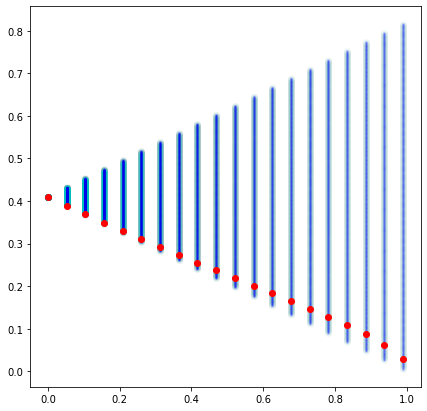

In [333]:
plt.figure(figsize=(7,7))
for i, sv in enumerate(sigma_coeff_var):
    l = [res_cov_ind[i][k][0,0] for k in range(N_likelihoods)]
    plt.scatter(sv*np.linspace(1,1, N_likelihoods), l, color = 'c', alpha = .01)
    plt.scatter(sv*np.linspace(1,1, N_likelihoods), l, color = 'b', marker = '.', alpha = .06, s=10)
    plt.scatter(sv,cov_param[i][0,0], marker='o', color = 'r')
#plt.ylim(0, 5)

In [259]:
l = [res_cov_ind[18][k][1,1] for k in range(N_likelihoods)]

(array([164., 195., 201., 164., 123.,  93.,  40.,  15.,   3.,   2.]),
 array([1.05231380e-04, 1.42195991e-01, 2.84286750e-01, 4.26377509e-01,
        5.68468269e-01, 7.10559028e-01, 8.52649788e-01, 9.94740547e-01,
        1.13683131e+00, 1.27892207e+00, 1.42101283e+00]),
 <a list of 10 Patch objects>)

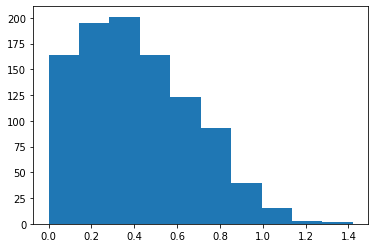

In [260]:
plt.hist(l)

In [301]:
np.random.seed(10)

In [305]:
np.random.random(1)

array([0.74880388])

In [291]:
rng = np.random.default_rng(12345)

In [300]:
rng.standard_normal()

0.361058113054895

In [307]:
s = str(np.pi)

In [308]:
s.replace('.', '')

'3141592653589793'